In [20]:
import numpy as np
import pandas as pd

from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt
from matplotlib import gridspec

import matplotlib.pyplot as plt 
import seaborn as sns

import hicstraw

# Hi-C Straw

(roughly based on https://colab.research.google.com/drive/1-GG-n-p9nZ7Be82UVJG7n3Q_wQ9IeuFN?usp=sharing#scrollTo=eVxfBGU1ZajP)

In [21]:
# Get hic file handle
# hic = hicstraw.HiCFile("https://www.encodeproject.org/files/ENCFF718AWL/@@download/ENCFF718AWL.hic")
hic = hicstraw.HiCFile("GSM1551688_HIC143.hic")  # https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM1551688

Query basic properties:

In [22]:
print(hic.getGenomeID())
print(hic.getResolutions())

hg19
[2500000, 1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000]


In [23]:
for chrom in hic.getChromosomes():
  print(f'Chromosome label:"{chrom.name}", length:\t{chrom.length:12,}bp')

Chromosome label:"All", length:	   3,098,789bp
Chromosome label:"1", length:	 249,250,621bp
Chromosome label:"2", length:	 243,199,373bp
Chromosome label:"3", length:	 198,022,430bp
Chromosome label:"4", length:	 191,154,276bp
Chromosome label:"5", length:	 180,915,260bp
Chromosome label:"6", length:	 171,115,067bp
Chromosome label:"7", length:	 159,138,663bp
Chromosome label:"8", length:	 146,364,022bp
Chromosome label:"9", length:	 141,213,431bp
Chromosome label:"10", length:	 135,534,747bp
Chromosome label:"11", length:	 135,006,516bp
Chromosome label:"12", length:	 133,851,895bp
Chromosome label:"13", length:	 115,169,878bp
Chromosome label:"14", length:	 107,349,540bp
Chromosome label:"15", length:	 102,531,392bp
Chromosome label:"16", length:	  90,354,753bp
Chromosome label:"17", length:	  81,195,210bp
Chromosome label:"18", length:	  78,077,248bp
Chromosome label:"19", length:	  59,128,983bp
Chromosome label:"20", length:	  63,025,520bp
Chromosome label:"21", length:	  48,129,89

In [24]:
# Intermediate object
matrix_object_chr4 = hic.getMatrixZoomData('11', '11', "observed", "NONE", "BP", 100_000)

Get a subset of the data as a numpy matrix:

In [25]:
X = matrix_object_chr4.getRecordsAsMatrix(65_000_000, 85_000_000, 65_000_000, 85_000_000)
# warning, if there is no data in a given region, you will get a 1x1 matrix!
X.shape

(201, 201)

In [26]:
X

array([[40.,  6.,  1., ...,  0.,  0.,  0.],
       [ 6., 49., 20., ...,  0.,  0.,  0.],
       [ 1., 20., 78., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 32.,  2.,  1.],
       [ 0.,  0.,  0., ...,  2., 38.,  3.],
       [ 0.,  0.,  0., ...,  1.,  3., 32.]])

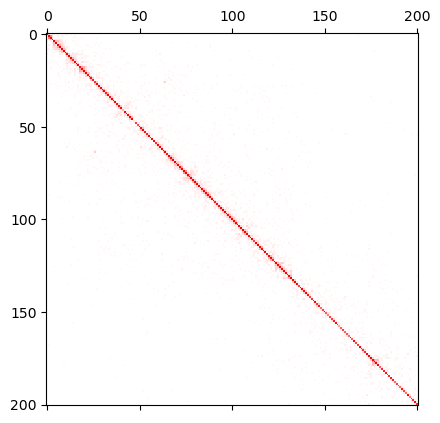

In [27]:
REDMAP = LinearSegmentedColormap.from_list("bright_red", [(1,1,1),(1,0,0)])

# helper function for plotting
def plot_hic_map(dense_matrix, max_color):
    plt.matshow(dense_matrix, cmap=REDMAP, vmin=0, vmax=max_color)
    plt.show()

plot_hic_map(X, X.max() / 2)

In [28]:
result = hicstraw.straw("observed", 'KR', 'GSM1551688_HIC143.hic', '4:1000000:2000000', '4:1000000:2000000', 'BP', 10_000)
for i in range(10):
    print(result[i].binX, result[i].binX, result[i].counts)

1400000 1400000 1.686457872390747
1530000 1530000 6.435894966125488
1680000 1680000 0.5157460570335388
1020000 1020000 2.630796432495117
1890000 1890000 1.7725704908370972
1040000 1040000 3.9029037952423096
1840000 1840000 3.407468557357788
1150000 1150000 0.8546689748764038
1580000 1580000 1.022089958190918
1160000 1160000 0.6566410064697266


# Tasks

1. Find a way to show nice raw (i.e. observed, no norm.) heatmaps (_hint_: `qua_____s`)
2. Explore different normalizations
3. Plot interaction frequency vs genomic distance (use lower resolution). How does it look like? Try to fit a function e.g. using `curve_fit` from `scipy.optimize`